In [1]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline

In [2]:
sales_pdf = pd.read_csv('../UseCase_3_Datasets/sales_granular.csv')

In [3]:
sales_pdf.shape
sales_pdf.columns

Index(['store_code', '8/3/15 9:00', '8/3/15 10:00', '8/3/15 11:00',
       '8/3/15 12:00', '8/3/15 13:00', '8/3/15 14:00', '8/3/15 15:00',
       '8/3/15 16:00', '8/3/15 17:00',
       ...
       '6/25/17 13:00', '6/25/17 14:00', '6/25/17 15:00', '6/25/17 16:00',
       '6/25/17 17:00', '6/25/17 18:00', '6/25/17 19:00', '6/25/17 20:00',
       '6/25/17 21:00', '6/25/17 22:00'],
      dtype='object', length=11937)

In [4]:
sales_pdf_daily = sales_pdf.fillna(0)

In [5]:
sales_pdf_daily.head()

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,8/3/15 18:00,8/3/15 19:00,8/3/15 22:00,8/4/15 8:00,8/4/15 9:00,8/4/15 10:00,8/4/15 11:00,8/4/15 12:00,8/4/15 13:00,8/4/15 14:00,8/4/15 15:00,8/4/15 16:00,8/4/15 17:00,8/4/15 18:00,8/4/15 19:00,8/4/15 20:00,8/5/15 7:00,8/5/15 9:00,8/5/15 10:00,8/5/15 11:00,8/5/15 12:00,8/5/15 13:00,8/5/15 14:00,8/5/15 15:00,8/5/15 16:00,8/5/15 17:00,8/5/15 18:00,8/5/15 19:00,8/5/15 20:00,8/6/15 9:00,8/6/15 10:00,8/6/15 11:00,8/6/15 12:00,8/6/15 13:00,8/6/15 14:00,8/6/15 15:00,8/6/15 16:00,8/6/15 17:00,8/6/15 18:00,8/6/15 19:00,8/6/15 21:00,8/7/15 6:00,8/7/15 7:00,8/7/15 8:00,8/7/15 9:00,8/7/15 10:00,8/7/15 11:00,8/7/15 12:00,8/7/15 13:00,8/7/15 14:00,8/7/15 15:00,8/7/15 16:00,8/7/15 17:00,8/7/15 18:00,8/7/15 19:00,8/8/15 6:00,8/8/15 7:00,8/8/15 9:00,8/8/15 10:00,8/8/15 11:00,8/8/15 12:00,8/8/15 13:00,8/8/15 14:00,8/8/15 15:00,8/8/15 16:00,8/8/15 17:00,8/8/15 18:00,8/8/15 21:00,8/8/15 22:00,8/9/15 7:00,8/9/15 9:00,8/9/15 11:00,8/9/15 12:00,8/9/15 13:00,8/9/15 14:00,8/9/15 15:00,8/9/15 16:00,8/9/15 18:00,8/9/15 19:00,8/9/15 21:00,8/10/15 7:00,8/10/15 9:00,8/10/15 10:00,8/10/15 11:00,8/10/15 12:00,8/10/15 13:00,8/10/15 14:00,8/10/15 15:00,8/10/15 16:00,8/10/15 17:00,...,6/20/17 17:00,6/20/17 18:00,6/20/17 19:00,6/20/17 20:00,6/20/17 21:00,6/20/17 22:00,6/20/17 23:00,6/21/17 5:00,6/21/17 6:00,6/21/17 7:00,6/21/17 8:00,6/21/17 9:00,6/21/17 10:00,6/21/17 11:00,6/21/17 12:00,6/21/17 13:00,6/21/17 14:00,6/21/17 15:00,6/21/17 16:00,6/21/17 17:00,6/21/17 18:00,6/21/17 19:00,6/21/17 20:00,6/21/17 21:00,6/21/17 22:00,6/22/17 2:00,6/22/17 5:00,6/22/17 6:00,6/22/17 7:00,6/22/17 8:00,6/22/17 9:00,6/22/17 10:00,6/22/17 11:00,6/22/17 12:00,6/22/17 13:00,6/22/17 14:00,6/22/17 15:00,6/22/17 16:00,6/22/17 17:00,6/22/17 18:00,6/22/17 19:00,6/22/17 20:00,6/22/17 21:00,6/22/17 22:00,6/23/17 5:00,6/23/17 6:00,6/23/17 7:00,6/23/17 8:00,6/23/17 9:00,6/23/17 10:00,6/23/17 11:00,6/23/17 12:00,6/23/17 13:00,6/23/17 14:00,6/23/17 15:00,6/23/17 16:00,6/23/17 17:00,6/23/17 18:00,6/23/17 19:00,6/23/17 20:00,6/23/17 21:00,6/23/17 22:00,6/23/17 23:00,6/24/17 0:00,6/24/17 5:00,6/24/17 6:00,6/24/17 7:00,6/24/17 8:00,6/24/17 9:00,6/24/17 10:00,6/24/17 11:00,6/24/17 12:00,6/24/17 13:00,6/24/17 14:00,6/24/17 15:00,6/24/17 16:00,6/24/17 17:00,6/24/17 18:00,6/24/17 19:00,6/24/17 20:00,6/24/17 21:00,6/24/17 22:00,6/24/17 23:00,6/25/17 6:00,6/25/17 7:00,6/25/17 8:00,6/25/17 9:00,6/25/17 10:00,6/25/17 11:00,6/25/17 12:00,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
0,10055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
# #Calculate the no.of sales per hour, in the above sales granular information.
# #Filter , columsn where a lot of entry is empty .
# from datetime import datetime as dt

# col_list = sales_pdf_daily.columns
# for col in col_list[1:]:
#     if dt.strptime(col.split(" ")[0],"%m/%d/%y") < dt.strptime("10/1/16", "%m/%d/%y"):
#         #print ("Cols to delete", col)
#         sales_pdf_daily.drop(col, axis = 1, inplace = True)

In [7]:
# sales_pdf_daily[sales_pdf_daily.store_code == 10055].hist()
# plt.show()

In [8]:
sales_pdf_daily['total_sales'] = sales_pdf_daily.loc[:, sales_pdf_daily.columns != 'store_code'].sum(axis=1)
sales_pdf_daily['sales_per_hr'] = sales_pdf_daily['total_sales']/sales_pdf_daily.shape[1]
sales_pdf_daily['sales_per_hr'].describe()
sales_pdf_daily.head()

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,8/3/15 18:00,8/3/15 19:00,8/3/15 22:00,8/4/15 8:00,8/4/15 9:00,8/4/15 10:00,8/4/15 11:00,8/4/15 12:00,8/4/15 13:00,8/4/15 14:00,8/4/15 15:00,8/4/15 16:00,8/4/15 17:00,8/4/15 18:00,8/4/15 19:00,8/4/15 20:00,8/5/15 7:00,8/5/15 9:00,8/5/15 10:00,8/5/15 11:00,8/5/15 12:00,8/5/15 13:00,8/5/15 14:00,8/5/15 15:00,8/5/15 16:00,8/5/15 17:00,8/5/15 18:00,8/5/15 19:00,8/5/15 20:00,8/6/15 9:00,8/6/15 10:00,8/6/15 11:00,8/6/15 12:00,8/6/15 13:00,8/6/15 14:00,8/6/15 15:00,8/6/15 16:00,8/6/15 17:00,8/6/15 18:00,8/6/15 19:00,8/6/15 21:00,8/7/15 6:00,8/7/15 7:00,8/7/15 8:00,8/7/15 9:00,8/7/15 10:00,8/7/15 11:00,8/7/15 12:00,8/7/15 13:00,8/7/15 14:00,8/7/15 15:00,8/7/15 16:00,8/7/15 17:00,8/7/15 18:00,8/7/15 19:00,8/8/15 6:00,8/8/15 7:00,8/8/15 9:00,8/8/15 10:00,8/8/15 11:00,8/8/15 12:00,8/8/15 13:00,8/8/15 14:00,8/8/15 15:00,8/8/15 16:00,8/8/15 17:00,8/8/15 18:00,8/8/15 21:00,8/8/15 22:00,8/9/15 7:00,8/9/15 9:00,8/9/15 11:00,8/9/15 12:00,8/9/15 13:00,8/9/15 14:00,8/9/15 15:00,8/9/15 16:00,8/9/15 18:00,8/9/15 19:00,8/9/15 21:00,8/10/15 7:00,8/10/15 9:00,8/10/15 10:00,8/10/15 11:00,8/10/15 12:00,8/10/15 13:00,8/10/15 14:00,8/10/15 15:00,8/10/15 16:00,8/10/15 17:00,...,6/20/17 19:00,6/20/17 20:00,6/20/17 21:00,6/20/17 22:00,6/20/17 23:00,6/21/17 5:00,6/21/17 6:00,6/21/17 7:00,6/21/17 8:00,6/21/17 9:00,6/21/17 10:00,6/21/17 11:00,6/21/17 12:00,6/21/17 13:00,6/21/17 14:00,6/21/17 15:00,6/21/17 16:00,6/21/17 17:00,6/21/17 18:00,6/21/17 19:00,6/21/17 20:00,6/21/17 21:00,6/21/17 22:00,6/22/17 2:00,6/22/17 5:00,6/22/17 6:00,6/22/17 7:00,6/22/17 8:00,6/22/17 9:00,6/22/17 10:00,6/22/17 11:00,6/22/17 12:00,6/22/17 13:00,6/22/17 14:00,6/22/17 15:00,6/22/17 16:00,6/22/17 17:00,6/22/17 18:00,6/22/17 19:00,6/22/17 20:00,6/22/17 21:00,6/22/17 22:00,6/23/17 5:00,6/23/17 6:00,6/23/17 7:00,6/23/17 8:00,6/23/17 9:00,6/23/17 10:00,6/23/17 11:00,6/23/17 12:00,6/23/17 13:00,6/23/17 14:00,6/23/17 15:00,6/23/17 16:00,6/23/17 17:00,6/23/17 18:00,6/23/17 19:00,6/23/17 20:00,6/23/17 21:00,6/23/17 22:00,6/23/17 23:00,6/24/17 0:00,6/24/17 5:00,6/24/17 6:00,6/24/17 7:00,6/24/17 8:00,6/24/17 9:00,6/24/17 10:00,6/24/17 11:00,6/24/17 12:00,6/24/17 13:00,6/24/17 14:00,6/24/17 15:00,6/24/17 16:00,6/24/17 17:00,6/24/17 18:00,6/24/17 19:00,6/24/17 20:00,6/24/17 21:00,6/24/17 22:00,6/24/17 23:00,6/25/17 6:00,6/25/17 7:00,6/25/17 8:00,6/25/17 9:00,6/25/17 10:00,6/25/17 11:00,6/25/17 12:00,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00,total_sales,sales_per_hr
0,10055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33780.0,2.829620
1,10077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

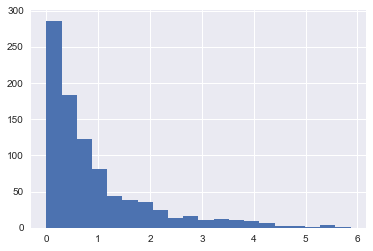

In [9]:
import math
sales_pdf_daily['sales_per_hr']= sales_pdf_daily['sales_per_hr'].apply(lambda x : math.log(x+1))
sales_pdf_daily['sales_per_hr'].hist(bins=20)
plt.show()

In [10]:
sales_pdf_daily.to_csv("../UseCase_3_Datasets/sales_per_hr.csv",index_label=False)

In [11]:
def getPhar(hour):
    if hour in ['5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00']:
        return "Morning"
    if hour in ['13:00','14:00','15:00','16:00']:
        return "Afternoon"
    if hour in ['17:00','18:00','19:00','20:00','21:00']:
        return "Evening"
    else :
        return "Night"

def merge_hr(df):
    df = df.fillna(0)
    temp_df = pd.DataFrame()
    for col in df.columns[:]:
        #print (col.split(" "))
        if len(col.split(" "))>=2:
            phar = getPhar(col.split(" ")[1])
            if phar in temp_df.columns:
                temp_df[phar] = temp_df[phar]+df[col]
            else :
                temp_df[phar] = df[col]
        else :
            temp_df[col] = df[col]
    temp_df['store_code']=df['store_code']
    return temp_df


sales_pdf_hr =  merge_hr(sales_pdf_daily)
sales_pdf_hr.head()

,store_code,Morning,Afternoon,Evening,Night,total_sales,sales_per_hr
0,10055,14790.0,11550.0,7440.0,0.0,33780.0,1.342766
1,10077,1320.0,1200.0,1380.0,0.0,3900.0,0.282686
2,10079,107820.0,117630.0,44760.0,0.0,270210.0,3.162705
3,10081,158550.0,124920.0,120540.0,0.0,404010.0,3.550834
4,10085,17100.0,14010.0,11070.0,0.0,42180.0,1.511440


In [12]:
sales_pdf_hr['Morning'] = sales_pdf_hr['Morning']/(sales_pdf_hr['total_sales']+1)
sales_pdf_hr['Afternoon'] = sales_pdf_hr['Afternoon']/(sales_pdf_hr['total_sales']+1)
sales_pdf_hr['Evening'] = sales_pdf_hr['Evening']/(sales_pdf_hr['total_sales']+1)
sales_pdf_hr['Night'] = sales_pdf_hr['Night']/(sales_pdf_hr['total_sales']+1)

In [13]:
sales_pdf_hr.describe()

,store_code,Morning,Afternoon,Evening,Night,total_sales,sales_per_hr
count,906.000000,906.000000,906.000000,906.000000,906.000000,9.060000e+02,906.000000
mean,28747.131347,0.412742,0.393324,0.190988,0.001247,7.218096e+04,0.934636
std,17220.398724,0.151892,0.994707,1.013119,0.011625,2.814652e+05,1.045508
min,249.000000,0.000000,0.000000,-30.000000,0.000000,0.000000e+00,0.000000
25%,20149.250000,0.327358,0.280041,0.136157,0.000000,3.097500e+03,0.230687
50%,25727.500000,0.399768,0.354239,0.213481,0.000000,9.030000e+03,0.563270
75%,30833.250000,0.488513,0.422782,0.306238,0.000000,2.785500e+04,1.203959
max,85011.000000,0.996678,30.000000,0.983607,0.272645,4.209750e+06,5.868264


In [14]:
# sales = {'account': ['Jones LLC', 'Alpha Co', 'Blue Inc'],
#          'Jan': [150, 200, 50],
#          'Feb': [200, 210, 90],
#          'Mar': [140, 215, 95]}
# df = pd.DataFrame.from_dict(sales)
# df.head()

In [15]:
# df[:].sum(axis=1)

In [16]:
sales_pdf_hr.loc[sales_pdf_hr['Afternoon'] == 30.0]

,store_code,Morning,Afternoon,Evening,Night,total_sales,sales_per_hr
766,34713,0.0,30.0,-30.0,0.0,0.0,0.0


In [17]:
#Clean the data set a bit
sales_pdf_hr = sales_pdf_hr.query('Afternoon >= 0.0' and 'Afternoon <= 1.0')
sales_pdf_hr = sales_pdf_hr.query('Evening >= 0.0' and 'Evening <= 1.0')
sales_pdf_hr.describe()

,store_code,Morning,Afternoon,Evening,Night,total_sales,sales_per_hr
count,905.000000,905.000000,905.000000,905.000000,905.000000,9.050000e+02,905.000000
mean,28740.539227,0.413198,0.360610,0.224348,0.001248,7.226072e+04,0.935669
std,17228.776823,0.151354,0.140796,0.134684,0.011631,2.816106e+05,1.045623
min,249.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+01,0.002510
25%,20148.000000,0.327422,0.279929,0.136157,0.000000,3.120000e+03,0.232183
50%,25700.000000,0.399778,0.354044,0.213512,0.000000,9.060000e+03,0.564701
75%,30819.000000,0.488527,0.422170,0.306252,0.000000,2.793000e+04,1.205847
max,85011.000000,0.996678,0.999075,0.983607,0.272645,4.209750e+06,5.868264


In [18]:
sales_pdf_hr.to_csv("../UseCase_3_Datasets/sales_per_day_period.csv",index_label=False)